In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

# Preprocessing: Selecting only necessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [3]:
# Text Cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply cleaning
df['message'] = df['message'].apply(clean_text)

# Feature extraction with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model - Multinomial Naive Bayes
model = MultinomialNB()

# GridSearchCV for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Trying different smoothing values
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [4]:
# Best model after tuning
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

In [5]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f'Model Accuracy after Tuning: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Best Alpha: 0.5
Model Accuracy after Tuning: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [6]:
# Test with a sample message
sample_message = ["Congratulations! You won a free vacation. Click the link now!"]
sample_transformed = vectorizer.transform(sample_message)
prediction = best_model.predict(sample_transformed)
print("Spam" if prediction[0] else "Not Spam")

Spam


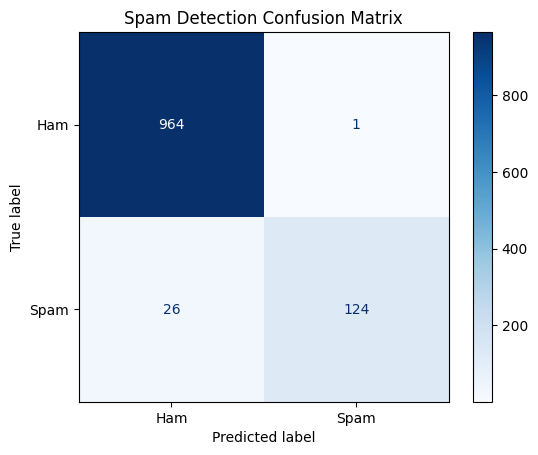

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues', values_format='d')

# Show the plot
plt.title('Spam Detection Confusion Matrix')
plt.show()


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

Precision: 0.99
Recall: 0.83
F1 Score: 0.90
ROC-AUC Score: 0.91
